# Time series analysis of SpaceX launches

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

In [ ]:
# Check the first few rows
print(df.head())

# Check column names and data types
print(df.info())

  Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0             1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1             2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2             3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3             4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4             5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit               NaN   
1  Dragon demo flight C1, two CubeSats,  barrel o...               NaN   
2                             Dragon demo flight C2+              525    
3                                       SpaceX CRS-1              500    
4                                       SpaceX CRS-2              677    

       Orbit         Customer Mission Outcome        Landing Outcome  
0        LEO           SpaceX         Success  Failure   

In [ ]:
# Convert the launch date to datetime format
df['date'] = pd.to_datetime(df['Date'], errors='coerce')  # Adjust the column name if needed

In [ ]:
# Set the date column as index
df.set_index('date', inplace=True)

In [ ]:
# Check the first few rows
print(df.head())

# Check column names and data types
print(df.info())

           Flight Number        Date Time (UTC) Booster Version  Launch Site  \
date                                                                           
2010-06-04             1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
2010-12-08             2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2012-05-22             3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
2012-10-08             4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
2013-03-01             5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                      Payload  \
date                                                            
2010-06-04               Dragon Spacecraft Qualification Unit   
2010-12-08  Dragon demo flight C1, two CubeSats,  barrel o...   
2012-05-22                             Dragon demo flight C2+   
2012-10-08                                       SpaceX CRS-1   
2013-03-01                                       

In [ ]:
# Check for missing data
print(df.isnull().sum())
# This returns a count of missing values in each column

Flight Number        0
Date                 0
Time (UTC)           0
Booster Version      0
Launch Site          0
Payload              0
Payload Mass (kg)    2
Orbit                0
Customer             0
Mission Outcome      0
Landing Outcome      0
dtype: int64


In [ ]:
# Drop rows with missing values for example if values are missing in 'Launch Success'
df.dropna(subset=['Payload Mass (kg)'], inplace=True)
# Then check for missing data again

In [ ]:
# Check for missing data
print(df.isnull().sum())
# This returns a count of missing values in each column

Flight Number        0
Date                 0
Time (UTC)           0
Booster Version      0
Launch Site          0
Payload              0
Payload Mass (kg)    0
Orbit                0
Customer             0
Mission Outcome      0
Landing Outcome      0
dtype: int64


In [ ]:
# Resample by month and count launches per month
launches_monthly = df.resample('M').size()  # 'M' for monthly
print(launches_monthly.head())

date
2012-05-31    1
2012-06-30    0
2012-07-31    0
2012-08-31    0
2012-09-30    0
Freq: ME, dtype: int64


<ipython-input-15-f3e420703077>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  launches_monthly = df.resample('M').size()  # 'M' for monthly


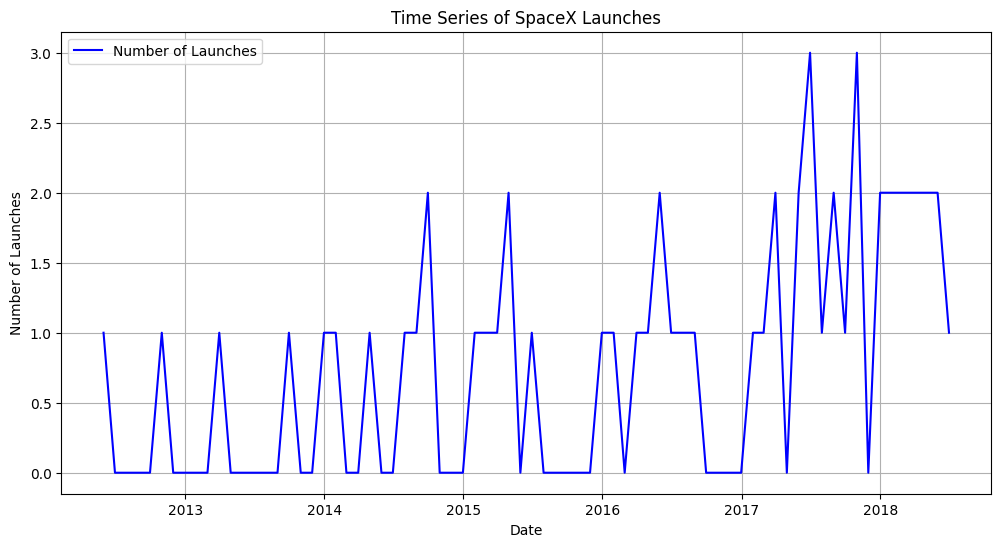

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series of launches by month
plt.figure(figsize=(12, 6))
plt.plot(launches_monthly, label='Number of Launches', color='blue')
plt.title('Time Series of SpaceX Launches')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend()
plt.show()

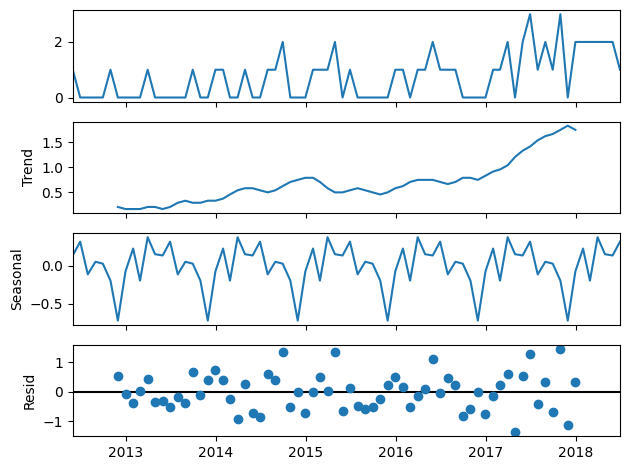

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(launches_monthly, model='additive')
decomposition.plot()
plt.show()

## **Conclusion**

**Identify the overall trend (e.g., increasing launches over time).**

The trend identified is that the number of launches have increased over time.

<br>

**Note any seasonal patterns (e.g., more launches in summer).**

There is a clear pattern evident which shows a dip once a year where no launches are occuring. Winter and the holiday season affects the number of launches by SpaceX each year.

<br>


**Flag any unusual spikes or drops (e.g., major missions or events).**

There is a major upward spike from the year 2017. This could be explained by significant events or high profile missions being initiated by SpaceX.
